In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [46]:
coverages = pd.read_csv("archive/art_coverage_by_country_clean.csv")
coverages = coverages.dropna()

coverages.head()

,Country,Reported number of people receiving ART,Estimated number of people living with HIV,Estimated ART coverage among people living with HIV (%),Estimated number of people living with HIV_median,Estimated number of people living with HIV_min,Estimated number of people living with HIV_max,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max,WHO Region
0,Afghanistan,920,7200[4100–11000],13[7–20],7200.0,4100.0,11000.0,13.0,7.0,20.0,Eastern Mediterranean
2,Algeria,12800,16000[15000–17000],81[75–86],16000.0,15000.0,17000.0,81.0,75.0,86.0,Africa
3,Angola,88700,330000[290000–390000],27[23–31],330000.0,290000.0,390000.0,27.0,23.0,31.0,Africa
4,Argentina,85500,140000[130000–150000],61[55–67],140000.0,130000.0,150000.0,61.0,55.0,67.0,Americas
5,Armenia,1900,3500[3000–4400],53[44–65],3500.0,3000.0,4400.0,53.0,44.0,65.0,Europe


In [47]:
coverages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         136 non-null    object 
 1   Reported number of people receiving ART                         136 non-null    object 
 2   Estimated number of people living with HIV                      136 non-null    object 
 3   Estimated ART coverage among people living with HIV (%)         136 non-null    object 
 4   Estimated number of people living with HIV_median               136 non-null    float64
 5   Estimated number of people living with HIV_min                  136 non-null    float64
 6   Estimated number of people living with HIV_max                  136 non-null    float64
 7   Estimated ART coverage among people living with HIV (%)_me

In [48]:
coverages.columns

Index(['Country', 'Reported number of people receiving ART',
       'Estimated number of people living with HIV',
       'Estimated ART coverage among people living with HIV (%)',
       'Estimated number of people living with HIV_median',
       'Estimated number of people living with HIV_min',
       'Estimated number of people living with HIV_max',
       'Estimated ART coverage among people living with HIV (%)_median',
       'Estimated ART coverage among people living with HIV (%)_min',
       'Estimated ART coverage among people living with HIV (%)_max',
       'WHO Region'],
      dtype='object')

In [49]:
coverages = coverages.drop([
       'Estimated number of people living with HIV','Estimated ART coverage among people living with HIV (%)',
       'Estimated number of people living with HIV_min',
       'Estimated number of people living with HIV_median',
       'Estimated number of people living with HIV_max',
       'Estimated ART coverage among people living with HIV (%)_min',
       'Estimated ART coverage among people living with HIV (%)_max'],axis=1)

In [50]:
coverages["ART"] = coverages["Reported number of people receiving ART"];
coverages["ART"] = pd.to_numeric(coverages["ART"], errors='coerce');
coverages["ART"] = coverages.ART.astype(float);

In [51]:
coverages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 169
Data columns (total 5 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         136 non-null    object 
 1   Reported number of people receiving ART                         136 non-null    object 
 2   Estimated ART coverage among people living with HIV (%)_median  136 non-null    float64
 3   WHO Region                                                      136 non-null    object 
 4   ART                                                             136 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.4+ KB


In [52]:
coveragebyregion = coverages.groupby('WHO Region').sum()["ART"];
coveragebyregion

WHO Region
Africa                   16299000.0
Americas                  1391900.0
Eastern Mediterranean       75460.0
Europe                     750910.0
South-East Asia            655980.0
Western Pacific            376100.0
Name: ART, dtype: float64

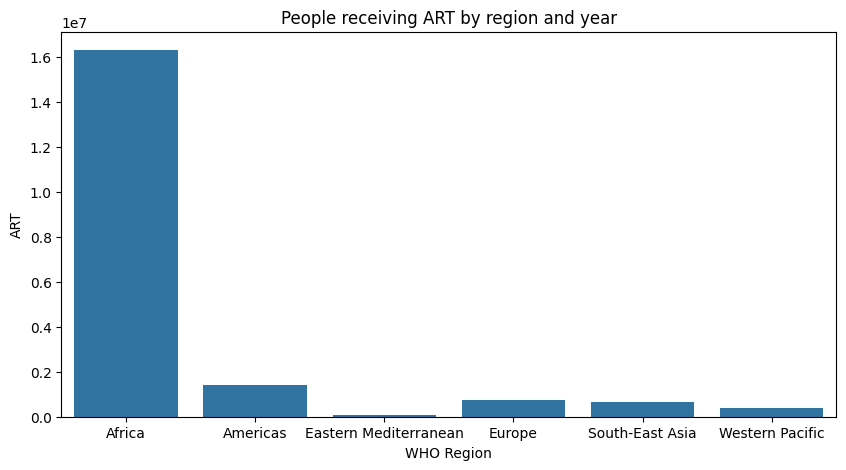

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(x = coveragebyregion.index, y = coveragebyregion);
plt.title('People receiving ART by region and year');
plt.show()

In [54]:
coverages.head()

,Country,Reported number of people receiving ART,Estimated ART coverage among people living with HIV (%)_median,WHO Region,ART
0,Afghanistan,920,13.0,Eastern Mediterranean,920.0
2,Algeria,12800,81.0,Africa,12800.0
3,Angola,88700,27.0,Africa,88700.0
4,Argentina,85500,61.0,Americas,85500.0
5,Armenia,1900,53.0,Europe,1900.0


In [55]:
cover = pd.read_csv("archive/art_coverage_by_country_clean.csv")
cover = cover.dropna()

cover = cover.drop([
       'Estimated number of people living with HIV',
       'Estimated ART coverage among people living with HIV (%)',
       'WHO Region'], axis=1);

In [56]:
mp = {}
cnt = 0;
for i in cover['Country']:
    if i not in mp:
        mp[i] = cnt;
        cnt += 1;
cover['Country'] = cover['Country'].map(mp);

In [57]:
cover.head()

,Country,Reported number of people receiving ART,Estimated number of people living with HIV_median,Estimated number of people living with HIV_min,Estimated number of people living with HIV_max,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max
0,0,920,7200.0,4100.0,11000.0,13.0,7.0,20.0
2,1,12800,16000.0,15000.0,17000.0,81.0,75.0,86.0
3,2,88700,330000.0,290000.0,390000.0,27.0,23.0,31.0
4,3,85500,140000.0,130000.0,150000.0,61.0,55.0,67.0
5,4,1900,3500.0,3000.0,4400.0,53.0,44.0,65.0


In [58]:
cover.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         136 non-null    int64  
 1   Reported number of people receiving ART                         136 non-null    object 
 2   Estimated number of people living with HIV_median               136 non-null    float64
 3   Estimated number of people living with HIV_min                  136 non-null    float64
 4   Estimated number of people living with HIV_max                  136 non-null    float64
 5   Estimated ART coverage among people living with HIV (%)_median  136 non-null    float64
 6   Estimated ART coverage among people living with HIV (%)_min     136 non-null    float64
 7   Estimated ART coverage among people living with HIV (%)_max

In [59]:
from sklearn import preprocessing as pp

In [60]:
# print(cover.mean())
pp.scale(cover)

array([[-1.71936162, -0.30254786, -0.29840881, ..., -2.12523784,
        -2.17402087, -2.09325126],
       [-1.6938896 , -0.27738236, -0.28660829, ...,  1.27102958,
         1.53750673,  0.94115173],
       [-1.66841757, -0.11660275,  0.13445572, ..., -1.42600631,
        -1.30072026, -1.58751743],
       ...,
       [ 1.66841757, -0.29983642, -0.29331313, ..., -1.72567697,
        -1.90111443, -1.40361422],
       [ 1.6938896 ,  1.73967087,  1.30109805, ...,  1.12119425,
         1.210019  ,  1.03310334],
       [ 1.71936162,  2.13367622,  1.43519486, ...,  1.62064534,
         1.64666931,  1.35493396]])

In [61]:
# pp.normalize(cover)
pp.binarize(cover, threshold=1)

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [62]:
df = pd.DataFrame(cover, columns=cover.columns)
df.head()

,Country,Reported number of people receiving ART,Estimated number of people living with HIV_median,Estimated number of people living with HIV_min,Estimated number of people living with HIV_max,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max
0,0,920,7200.0,4100.0,11000.0,13.0,7.0,20.0
2,1,12800,16000.0,15000.0,17000.0,81.0,75.0,86.0
3,2,88700,330000.0,290000.0,390000.0,27.0,23.0,31.0
4,3,85500,140000.0,130000.0,150000.0,61.0,55.0,67.0
5,4,1900,3500.0,3000.0,4400.0,53.0,44.0,65.0


In [63]:
coverages.head()

coveragebyregion1 = coverages.groupby('WHO Region').sum()["Estimated ART coverage among people living with HIV (%)_median"];

cnt = {}
label = ['Eastern Mediterranean', 'Africa', 'Americas', 'Europe', 'Western Pacific', 'South-East Asia'];

for i in coverages['WHO Region']:
    if i not in cnt: cnt[i] = 1;
    else: cnt[i] += 1;

for i in label: 
    coveragebyregion1[i] /= cnt[i];

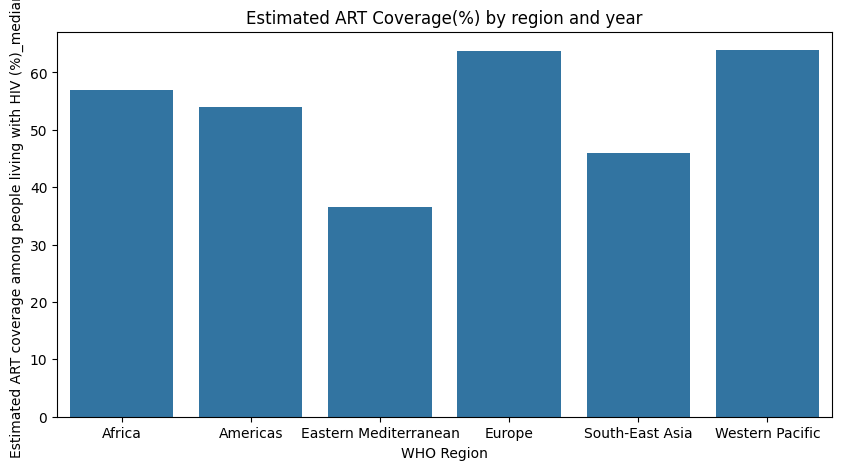

In [64]:
plt.figure(figsize=(10, 5))
sns.barplot(x = coveragebyregion1.index, y = coveragebyregion1);
plt.title("Estimated ART Coverage(%) by region and year");
plt.show()

### W4_課堂練習

In [65]:
num = [17, 42, 35, 29, 12, 21, 6, 29, 22];
num.sort();
print(num);

[6, 12, 17, 21, 22, 29, 29, 35, 42]


In [66]:
mx = num[-1];
mn = num[0];

Width = (mx - mn) / 3;
print(Width);

12.0


#### Equal Width

In [67]:
b1 = []; b2 = []; b3 = [];
for i in num: 
    if (i <= mn + Width): b1.append(i);
    elif (i <= mn + 2 * Width): b2.append(i);
    else: b3.append(i);

print(b1)
print(b2)
print(b3)

[6, 12, 17]
[21, 22, 29, 29]
[35, 42]


#### Means

In [68]:
means1 = np.mean(b1);
means2 = np.mean(b2);
means3 = np.mean(b3);

m1 = []; m2 = []; m3 = [];

for i in b1: m1.append(means1);
for i in b2: m2.append(means2);
for i in b3: m3.append(means3);

print([round(a, 2) for a in m1]);
print([round(a, 2) for a in m2]);
print([round(a, 2) for a in m3]);

[11.67, 11.67, 11.67]
[25.25, 25.25, 25.25, 25.25]
[38.5, 38.5]


#### Median

In [69]:
median1 = np.median(b1);
median2 = np.median(b2);
median3 = np.median(b3);

med1 = []; med2 = []; med3 = [];
for i in b1: med1.append(median1);
for i in b2: med2.append(median2);
for i in b3: med3.append(median3);

print(med1)
print(med2)
print(med3)

[12.0, 12.0, 12.0]
[25.5, 25.5, 25.5, 25.5]
[38.5, 38.5]


#### Boundries

In [70]:
Boundries1 = []; Boundries2 = []; Boundries3 = [];

for i in b1:
    if (abs(i - b1[0]) < abs(i - b1[-1])): Boundries1.append(b1[0]);
    else: Boundries1.append(b1[-1]);

for i in b2:
    if (abs(i - b2[0]) < abs(i - b2[-1])): Boundries2.append(b2[0]);
    else: Boundries2.append(b2[-1]);

for i in b3:
    if (abs(i - b3[0]) < abs(i - b3[-1])): Boundries3.append(b3[0]);
    else: Boundries3.append(b3[-1]);

print(Boundries1)
print(Boundries2)
print(Boundries3)

[6, 17, 17]
[21, 21, 29, 29]
[35, 42]


### W4課堂練習_2

> Min-Max Normalization

In [71]:
arr = [200, 300, 400, 600, 1000];
tmp = arr[0::];
tmp.sort();
mn = tmp[0]; mx = tmp[-1];

nor = [];

for i in arr:
    nor.append((i - mn) / (mx - mn));

print(nor)


[0.0, 0.125, 0.25, 0.5, 1.0]


> Z-Score Normalization

In [72]:
mean = np.mean(arr);
SD = np.std(arr);

z = [];
for i in arr:
    z.append((i - mean) / SD);

print([round(a, 4) for a in z]);

[-1.0607, -0.7071, -0.3536, 0.3536, 1.7678]


### Week 5

In [84]:
from sklearn import feature_selection as fs
from sklearn import tree
from sklearn import ensemble as es
from sklearn import decomposition as dc

In [122]:
df = pd.read_csv("archive/art_coverage_by_country_clean.csv")
df = df.dropna()

# df.head()
df = df.drop(['Estimated number of people living with HIV_min',
       'Estimated number of people living with HIV_median',
       'Estimated number of people living with HIV_max', "Reported number of people receiving ART", "Estimated number of people living with HIV", "Country", "Estimated ART coverage among people living with HIV (%)"], axis = 1);

df.head()

,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max,WHO Region
0,13.0,7.0,20.0,Eastern Mediterranean
2,81.0,75.0,86.0,Africa
3,27.0,23.0,31.0,Africa
4,61.0,55.0,67.0,Americas
5,53.0,44.0,65.0,Europe


In [123]:
label: list[str] = ['Eastern Mediterranean', 'Africa', 'Americas', 'Europe', 'Western Pacific', 'South-East Asia'];
cnt: list[int] = [i for i in range(len(label))];

mp = {};
for i in range(len(label)):
    mp[label[i]] = cnt[i];

df['WHO Region'] = df['WHO Region'].map(mp);

In [124]:
df.head()

target = df['WHO Region'];
df = df.drop(['WHO Region'], axis = 1);

In [125]:
skb = fs.SelectKBest(fs.f_classif, k=3);

skb.fit_transform(df, target);

In [126]:
tc = tree.DecisionTreeClassifier();
tc.fit(df, target);
tc.feature_importances_

array([0.35151865, 0.36628282, 0.28219853])

In [127]:
rfc = es.RandomForestClassifier(n_estimators=1000);
rfc.fit(df, target);
rfc.feature_importances_

array([0.33244131, 0.34409665, 0.32346205])

In [128]:
srm = fs.SelectFromModel(rfc, prefit=True, threshold=0.03);
srm.transform(df)

/Users/stationshih/miniforge3/envs/env/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[13.,  7., 20.],
       [81., 75., 86.],
       [27., 23., 31.],
       [61., 55., 67.],
       [53., 44., 65.],
       [83., 70., 93.],
       [52., 45., 58.],
       [22., 19., 25.],
       [50., 44., 57.],
       [59., 48., 75.],
       [28., 26., 31.],
       [61., 40., 95.],
       [37., 20., 78.],
       [44., 40., 48.],
       [67., 57., 78.],
       [83., 75., 90.],
       [66., 51., 82.],
       [41., 35., 48.],
       [62., 50., 75.],
       [80., 69., 94.],
       [89., 75., 95.],
       [81., 71., 93.],
       [52., 46., 57.],
       [36., 30., 45.],
       [51., 40., 63.],
       [63., 56., 70.],
       [73., 60., 86.],
       [79., 39., 95.],
       [35., 27., 46.],
       [49., 44., 54.],
       [55., 44., 70.],
       [75., 67., 83.],
       [72., 55., 85.],
       [60., 51., 68.],
       [57., 47., 67.],
       [89., 79., 95.],
       [30., 25., 38.],
       [56., 43., 73.],
       [57., 38., 93.],
       [31., 28., 33.],
       [47., 39., 55.],
       [34., 27.

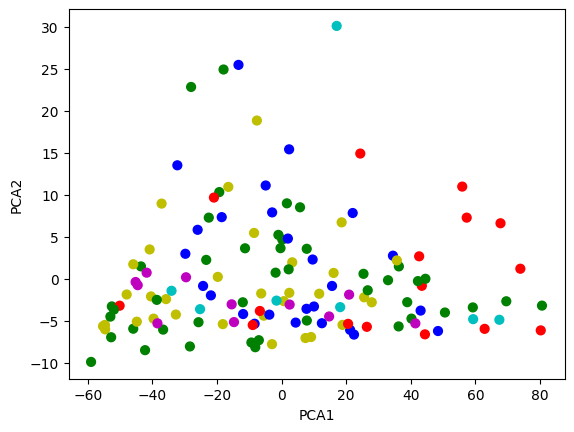

In [133]:
pca = dc.PCA(n_components=2);
# pca.fit(df, coverages['Estimated ART coverage among people living with HIV (%)_median']);
# print(pca.explained_variance_ratio_)

# scree_plot = pd.Series(pca.explained_variance_ratio_).plot.bar(rot = 1);

# df = df.drop(["Estimated number of people living with HIV_median", "Estimated number of people living with HIV_max", "Estimated number of people living with HIV_min"], axis=1);
# df = df.drop(["Reported number of people receiving ART"], axis = 1);
pcs = pca.fit_transform(df, target);
pcs_df = pd.DataFrame(pcs, columns=['PCA1', 'PCA2']);
pcs_df.head()

color: list[str] = [];

for i in target: 
    if (i == 0): color.append('r');
    elif (i == 1): color.append('g');
    elif (i == 2): color.append('b');
    elif (i == 3): color.append('y');
    elif (i == 4): color.append('m');
    else: color.append('c');

pcs_df.plot.scatter('PCA1', 'PCA2', c = color, s = 40);

In [130]:
df.head()

,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max
0,13.0,7.0,20.0
2,81.0,75.0,86.0
3,27.0,23.0,31.0
4,61.0,55.0,67.0
5,53.0,44.0,65.0
